Importing the libraries
 

In [1]:
import numpy as np
import pandas as pd
import io

Uploading the train.csv file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (2).csv


Using pandas to read the csv file and create feature_array and output_array 

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Train.csv']),header = None)

y = np.array(df[100].values )# gives a list
x = np.array(df.drop(100,axis = 1))
#x = feature_normalize(x) 

print(x.shape) 
print(y.shape)
print(df.shape)
#df


(10000, 100)
(10000,)
(10000, 101)


Splitting the data into training data and validation data

In [5]:

from sklearn.model_selection import train_test_split
#we want to split the data into 70:20:10 ratio for training |validation |testing
#train_size = 0.7
x = np.column_stack((np.ones(len(x)),x)) # adds a column of 1 s to the given x

x_train,x_valid,y_train,y_valid = train_test_split(x,y, train_size=0.8,random_state = 42)


print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
#print(x_test.shape,y_test.shape) 

(8000, 101) (8000,)
(2000, 101) (2000,)


The least squares solution w_ml to the regression problem using the analytical solution

In [6]:
w_ml = np.matmul(np.linalg.inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
print(w_ml.shape)

(101,)


Defining a gradient descent function to store the thetas for different iterations

In [7]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    #Fill Code Here
    m = len(X)
    lst = []
   
    for i in range(iterations):
       
        gradient =  np.matmul(np.matmul(X,theta) - y, X)/m
        theta = theta - alpha * gradient
        lst.append(theta)

    return lst


Obtaining a list w using gradient_descent_multi function storing w for different iterations

In [8]:
theta = np.zeros(x_train.shape[1])
w = gradient_descent_multi(x_train,y_train,theta,0.003,10001)


Plotting the norm of (w_t and w_ml) vs iterations 

[1.2197654307126, 1.1928488120332754, 1.166543892153089, 1.1408364741091879, 1.1157126988517, 1.0911590370641322, 1.0671622811851178, 1.043709537626497, 1.0207882191828481, 0.9983860376276932, 0.9764909964917425, 0.9550913840186397, 0.934175766293795, 0.9137329805419994, 0.8937521285896195, 0.8742225704872865, 0.85513391828908, 0.8364760299843208, 0.8182390035781802, 0.8004131713174011, 0.7829890940575304, 0.7659575557681428, 0.7493095581726278, 0.7330363155191957, 0.7171292494798444, 0.7015799841741059, 0.6863803413144738, 0.6715223354704872, 0.6569981694485262, 0.642800229784441, 0.6289210823462134, 0.6153534680439146, 0.6020902986442949, 0.5891246526874048, 0.5764497715027102, 0.5640590553222236, 0.5519460594882513, 0.5401044907533876, 0.5285282036704703, 0.5172111970702536, 0.5061476106246197, 0.49533172149318627, 0.4847579410512434, 0.47442081169698463, 0.46431500373605145, 0.45443531234146584, 0.44477665458705995, 0.4353340665525686, 0.4261027004985885, 0.417077822109649, 0.40825

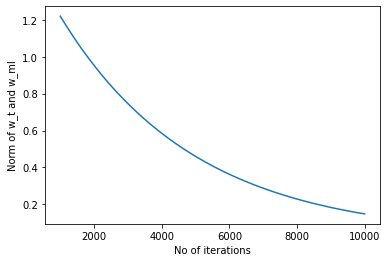

In [9]:
import matplotlib.pyplot as plt
t = np.linspace(1000,10000,101)
a = []
for i in range(1000,10001,90):
  a.append(np.linalg.norm(w[i] - w_ml)) #if theta_1 changes after going into the gradient descent , then we get a wrong plot for the below code 

print(a)
plt.plot(t,a)
plt.xlabel('No of iterations')
plt.ylabel('Norm of w_t and w_ml')
plt.show() 

Defining a cost function (error)

In [10]:
def compute_cost(X, y, w):
    return np.sum(np.square(np.matmul(X,w) - y)) / (2 * len(y))

Plotting the validation_error vs regularization_lambda

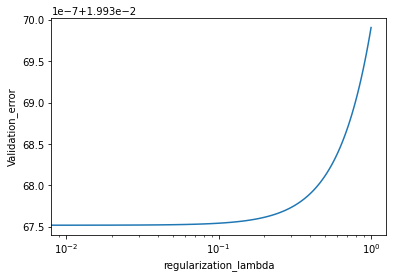

In [17]:
samp = np.linspace(0,1,100) # log plot eyyali
validation_ridge = []
for i in samp:
    w_minimum = np.matmul(np.linalg.inv(np.matmul(x_train.T,x_train) + i*np.identity(np.matmul(x_train.T,x_train).shape[0])),np.matmul(x_train.T,y_train))
    #print(w_minimum.shape)
    validation_ridge.append(compute_cost(x_train,y_train,w_minimum))

plt.plot(samp,validation_ridge)
plt.xscale('log')
plt.xlabel('regularization_lambda')
plt.ylabel('Validation_error')
plt.show()

Uploading test.csv file

In [12]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


Defining a gradient_descent_ridge function to obtain w_r

In [13]:
def gradient_descent_ridge(X, y, theta,ridge,alpha, iterations):
    #Fill Code Here
    m = len(X)
    lst_1 = []
   
    for i in range(iterations):
       
        gradient =  np.matmul(np.matmul(X,theta) - y, X)/m + (ridge/m)*theta
        theta = theta - alpha * gradient
        #lst_1.append(theta)

    return theta

Cost obtained by w_r is smaller than w_ml because by ridge_regression ,it works better on new_data (unseen_data).There is a chance that w_ml might overfit the train_data but it may not work better on new_data

In [18]:
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']),header = None)

y_test = np.array(df_test[100].values )# gives a list
x_test = df_test.drop(100,axis = 1).values
x_test = np.column_stack((np.ones(len(x_test)),x_test))

'''print(x_test.shape) 
print(y_test.shape)
print(df_test.shape) '''

theta = np.zeros(x_train.shape[1])
w_r = gradient_descent_ridge(x_train, y_train, theta,0.01 ,0.003, 5000)
print(w_r.shape)

print(compute_cost(x_test,y_test,w_r))
print(compute_cost(x_test,y_test,w_ml))


(101,)
0.14241261724114548
0.18559141406846533
